# Previsão de Eleição de Deputados
### Aluno: Rayana Souza Rocha

### Referências:

[Link do do Github da ativiade de Rayana](https://github.com/viniciuscva/disciplinaAM/tree/main/previsao_eleicao_deputados)



In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier
from statistics import mean
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('\nFormato do dataset train:',train.shape, '\n')
print('\nFormato do dataset test:',test.shape, '\n')
train.head(3)


Formato do dataset train: (7622, 24) 


Formato do dataset test: (4592, 23) 



,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,situacao
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.0,2766.67,0.0,...,14,14,16583.60,1184.54,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,nao_eleito
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.0,1755.85,6625.0,...,24,23,20325.99,846.92,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,nao_eleito
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,158120.8,9301.22,2250.0,...,123,108,146011.70,1187.09,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,eleito


In [3]:
train.isnull().sum()

ano                                      0
sequencial_candidato                     0
nome                                     0
uf                                       0
partido                                  0
quantidade_doacoes                       0
quantidade_doadores                      0
total_receita                            0
media_receita                            0
recursos_de_outros_candidatos.comites    0
recursos_de_pessoas_fisicas              0
recursos_de_pessoas_juridicas            0
recursos_proprios                        0
recursos_de_partido_politico             0
quantidade_despesas                      0
quantidade_fornecedores                  0
total_despesa                            0
media_despesa                            0
cargo                                    0
sexo                                     0
grau                                     0
estado_civil                             0
ocupacao                                 0
situacao   

In [4]:
test.isnull().sum()

ano                                      0
sequencial_candidato                     0
nome                                     0
uf                                       0
partido                                  0
quantidade_doacoes                       0
quantidade_doadores                      0
total_receita                            0
media_receita                            0
recursos_de_outros_candidatos.comites    0
recursos_de_pessoas_fisicas              0
recursos_de_pessoas_juridicas            0
recursos_proprios                        0
recursos_de_partido_politico             0
quantidade_despesas                      0
quantidade_fornecedores                  0
total_despesa                            0
media_despesa                            0
cargo                                    0
sexo                                     0
grau                                     0
estado_civil                             0
ocupacao                                 0
dtype: int6

In [5]:
X_train = train.loc[:,'partido':'ocupacao']
X_test = test.loc[:,'partido':'ocupacao']
print('\nFormato do dataset X_train:',X_train.shape, '\n')
print('\nFormato do dataset X_test:',X_test.shape, '\n')
X_train.head(3)


Formato do dataset X_train: (7622, 19) 


Formato do dataset X_test: (4592, 19) 



,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao
0,PT,6,6,16600.0,2766.67,0.0,9000.0,6300.0,1300.0,0.0,14,14,16583.60,1184.54,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR
1,PT,13,13,22826.0,1755.85,6625.0,15000.0,1000.0,201.0,0.0,24,23,20325.99,846.92,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL
2,PT,17,16,158120.8,9301.22,2250.0,34150.0,62220.8,59500.0,0.0,123,108,146011.70,1187.09,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO


In [6]:
train['situacao'].value_counts()

nao_eleito    6596
eleito        1026
Name: situacao, dtype: int64

In [7]:
y_train = pd.core.series.Series(train['situacao']=='eleito', dtype='int64')
y_train

0       0
1       0
2       1
3       0
4       1
       ..
7617    0
7618    0
7619    0
7620    0
7621    0
Name: situacao, Length: 7622, dtype: int64

In [8]:
numeric_features = list(X_train.dtypes[X_train.dtypes != "object"].index)
numeric_features

['quantidade_doacoes',
 'quantidade_doadores',
 'total_receita',
 'media_receita',
 'recursos_de_outros_candidatos.comites',
 'recursos_de_pessoas_fisicas',
 'recursos_de_pessoas_juridicas',
 'recursos_proprios',
 'recursos_de_partido_politico',
 'quantidade_despesas',
 'quantidade_fornecedores',
 'total_despesa',
 'media_despesa']

In [9]:
X_train[numeric_features] = np.log1p(X_train[numeric_features])
X_test[numeric_features] = np.log1p(X_test[numeric_features])
X_train.head(3)

,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao
0,PT,1.945910,1.945910,9.717218,7.925761,0.000000,9.105091,8.748464,7.170888,0.0,2.708050,2.708050,9.716230,7.077954,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR
1,PT,2.639057,2.639057,10.035699,7.471278,8.798757,9.615872,6.908755,5.308268,0.0,3.218876,3.178054,9.919705,6.742786,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL
2,PT,2.890372,2.833213,11.971121,9.138008,7.719130,10.438547,11.038461,10.993748,0.0,4.820282,4.691348,11.891449,7.080102,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO


In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train[numeric_features] = min_max_scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = min_max_scaler.fit_transform(X_test[numeric_features])
X_train.head(3)

,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao
0,PT,0.153520,0.157133,0.624727,0.603972,0.000000,0.643280,0.584328,0.461896,0.0,0.236756,0.241651,0.629989,0.539366,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR
1,PT,0.238463,0.244074,0.645203,0.569339,0.582155,0.679367,0.461450,0.341920,0.0,0.296779,0.298020,0.643183,0.513825,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL
2,PT,0.269260,0.268426,0.769633,0.696350,0.510723,0.737490,0.737282,0.708136,0.0,0.484948,0.479512,0.771028,0.539530,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO


In [11]:
categorical_features = list(X_train.dtypes[X_train.dtypes == "object"].index)
categorical_features

['partido', 'cargo', 'sexo', 'grau', 'estado_civil', 'ocupacao']

#### 1. Há desbalanceamento das classes (isto é, uma classe tem muito mais instâncias que outra)? Em que proporção? Quais efeitos colaterais o desbalanceamento de classes pode causar no classificador? Como você poderia tratar isso? (10 pt.)

In [12]:
X_train['partido'].value_counts()

PT         619
PMDB       598
PV         538
PDT        521
PSB        515
PSDB       497
PTB        418
PPS        340
PP         330
PSOL       307
PSC        288
PMN        273
PTC        256
PHS        228
PFL        192
PL         165
PC do B    163
DEM        163
PSL        161
PR         138
PT do B    134
PRTB       129
PRB        122
PSDC       116
PRP        114
PTN         94
PRONA       79
PAN         60
PSTU        41
PCB         14
PCO          9
Name: partido, dtype: int64

In [13]:
instancias_por_partido = X_train['partido'].value_counts()
media_instancias_por_partido = instancias_por_partido.mean()
media_instancias_por_partido

245.8709677419355

In [14]:
std_instancias_por_partido = instancias_por_partido.std()
std_instancias_por_partido

179.54400425067274

In [15]:
principais_partidos = list((instancias_por_partido[ (instancias_por_partido-media_instancias_por_partido)>=-1.2*std_instancias_por_partido ]).index)
principais_partidos

['PT',
 'PMDB',
 'PV',
 'PDT',
 'PSB',
 'PSDB',
 'PTB',
 'PPS',
 'PP',
 'PSOL',
 'PSC',
 'PMN',
 'PTC',
 'PHS',
 'PFL',
 'PL',
 'PC do B',
 'DEM',
 'PSL',
 'PR',
 'PT do B',
 'PRTB',
 'PRB',
 'PSDC',
 'PRP',
 'PTN',
 'PRONA',
 'PAN',
 'PSTU']

In [16]:
def substituirPartidosRarosPorOutros(x):
  if x not in principais_partidos:
    return 'OUTROS'
  return x

X_train['partido'] = X_train['partido'].apply(substituirPartidosRarosPorOutros)
X_test['partido'] = X_test['partido'].apply(substituirPartidosRarosPorOutros)
X_train['partido'].value_counts()

PT         619
PMDB       598
PV         538
PDT        521
PSB        515
PSDB       497
PTB        418
PPS        340
PP         330
PSOL       307
PSC        288
PMN        273
PTC        256
PHS        228
PFL        192
PL         165
PC do B    163
DEM        163
PSL        161
PR         138
PT do B    134
PRTB       129
PRB        122
PSDC       116
PRP        114
PTN         94
PRONA       79
PAN         60
PSTU        41
OUTROS      23
Name: partido, dtype: int64

In [17]:
X_train['cargo'].value_counts()

DEPUTADO FEDERAL    7622
Name: cargo, dtype: int64

In [18]:
del X_train['cargo']
del X_test['cargo']
categorical_features.remove('cargo')

In [19]:
X_train['sexo'].value_counts()

MASCULINO    6544
FEMININO     1078
Name: sexo, dtype: int64

In [20]:
X_train['grau'].value_counts()

SUPERIOR COMPLETO                4401
ENSINO MÉDIO COMPLETO            1498
SUPERIOR INCOMPLETO               832
ENSINO FUNDAMENTAL COMPLETO       455
ENSINO MÉDIO INCOMPLETO           210
ENSINO FUNDAMENTAL INCOMPLETO     194
LÊ E ESCREVE                       32
Name: grau, dtype: int64

In [21]:
X_train['estado_civil'].value_counts()

CASADO(A)                    4874
SOLTEIRO(A)                  1523
DIVORCIADO(A)                 780
SEPARADO(A) JUDICIALMENTE     316
VIÚVO(A)                      129
Name: estado_civil, dtype: int64

In [22]:
X_train['ocupacao'].value_counts()

OUTROS                    854
DEPUTADO                  717
ADVOGADO                  698
EMPRESÁRIO                662
COMERCIANTE               336
                         ... 
TÉCNICO DE BIOLOGIA         1
OPERADOR DE COMPUTADOR      1
ARQUEÓLOGO                  1
GARI OU LIXEIRO             1
FONOAUDIÓLOGO               1
Name: ocupacao, Length: 176, dtype: int64

In [23]:
print('Total médio de instâncias esperadas para cada ocupação empregatícia:',7622/176)

Total médio de instâncias esperadas para cada ocupação empregatícia: 43.30681818181818


In [24]:
totais_ocupacoes = X_train['ocupacao'].value_counts()
principais_ocupacoes = totais_ocupacoes[totais_ocupacoes>=43]
principais_ocupacoes

OUTROS                                             854
DEPUTADO                                           717
ADVOGADO                                           698
EMPRESÁRIO                                         662
COMERCIANTE                                        336
MÉDICO                                             335
VEREADOR                                           329
SERVIDOR PÚBLICO ESTADUAL                          254
SERVIDOR PÚBLICO FEDERAL                           221
PROFESSOR DE ENSINO MÉDIO                          180
ADMINISTRADOR                                      167
ENGENHEIRO                                         164
APOSENTADO (EXCETO SERVIDOR PÚBLICO)               162
POLICIAL MILITAR                                   156
PROFESSOR DE ENSINO SUPERIOR                       153
SERVIDOR PÚBLICO MUNICIPAL                         127
ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS      87
MILITAR REFORMADO                                   83
ECONOMISTA

In [25]:
principais_ocupacoes = list(principais_ocupacoes.index)
principais_ocupacoes

['OUTROS',
 'DEPUTADO',
 'ADVOGADO',
 'EMPRESÁRIO',
 'COMERCIANTE',
 'MÉDICO',
 'VEREADOR',
 'SERVIDOR PÚBLICO ESTADUAL',
 'SERVIDOR PÚBLICO FEDERAL',
 'PROFESSOR DE ENSINO MÉDIO',
 'ADMINISTRADOR',
 'ENGENHEIRO',
 'APOSENTADO (EXCETO SERVIDOR PÚBLICO)',
 'POLICIAL MILITAR',
 'PROFESSOR DE ENSINO SUPERIOR',
 'SERVIDOR PÚBLICO MUNICIPAL',
 'ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS',
 'MILITAR REFORMADO',
 'ECONOMISTA',
 'PROFESSOR DE ENSINO FUNDAMENTAL',
 'CONTADOR',
 'JORNALISTA E REDATOR',
 'CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES',
 'SERVIDOR PÚBLICO CIVIL APOSENTADO',
 'BANCÁRIO E ECONOMIÁRIO',
 'SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA',
 'AGRICULTOR',
 'POLICIAL CIVIL',
 'REPRESENTANTE COMERCIAL',
 'ODONTÓLOGO']

In [26]:
def substituirOcupacoesRarasPorOutros(x):
  if x not in principais_ocupacoes:
    return 'OUTROS'
  return x

#X_train['ocupacao'][~X_train['ocupacao'].isin(principais_ocupacoes)] = 'OUTROS'

X_train['ocupacao'] = X_train['ocupacao'].apply(substituirOcupacoesRarasPorOutros)
X_test['ocupacao'] = X_test['ocupacao'].apply(substituirOcupacoesRarasPorOutros)

X_train['ocupacao'].value_counts()

OUTROS                                             2088
DEPUTADO                                            717
ADVOGADO                                            698
EMPRESÁRIO                                          662
COMERCIANTE                                         336
MÉDICO                                              335
VEREADOR                                            329
SERVIDOR PÚBLICO ESTADUAL                           254
SERVIDOR PÚBLICO FEDERAL                            221
PROFESSOR DE ENSINO MÉDIO                           180
ADMINISTRADOR                                       167
ENGENHEIRO                                          164
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                162
POLICIAL MILITAR                                    156
PROFESSOR DE ENSINO SUPERIOR                        153
SERVIDOR PÚBLICO MUNICIPAL                          127
ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS       87
MILITAR REFORMADO                               

In [27]:
X_train.head(1)

,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao
0,PT,0.15352,0.157133,0.624727,0.603972,0.0,0.64328,0.584328,0.461896,0.0,0.236756,0.241651,0.629989,0.539366,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR


In [28]:
X_test.head(1)

,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,sexo,grau,estado_civil,ocupacao
0,PSOL,0.118765,0.125674,0.463585,0.494318,0.0,0.507273,0.0,0.0,0.282272,0.085859,0.088213,0.461147,0.596945,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES"


In [29]:
def validacao_cruzada(modelo, x, y, oversampling=False):
    kfold = KFold(n_splits=5)
    acuracias_split = []

    for idx, (idx_treino, idx_validacao) in enumerate(kfold.split(x)):
        x_split_treino = x.iloc[idx_treino, :]
        y_split_treino = y.iloc[idx_treino, :]

        if oversampling:
            sm = SMOTE(random_state=42)
            x_split_treino, y_split_treino = sm.fit_resample(x_split_treino, y_split_treino)

        modelo.fit(x_split_treino, y_split_treino.values.flatten())

        x_split_validacao = x.iloc[idx_validacao, :]
        y_split_validacao = y.iloc[idx_validacao, :]

        predicoes_validacao = modelo.predict(x_split_validacao)

        acuracia_split = accuracy_score(y_split_validacao, predicoes_validacao)

        acuracias_split.append(acuracia_split)

        print(f'Acurácia do split {idx}: {acuracia_split}')

    return acuracias_split

In [30]:
onehotencode = OneHotEncoder(X_train[categorical_features], use_cat_names=True)
dummies = onehotencode.fit_transform(X_train[categorical_features])
lista_dummies = list(onehotencode.get_feature_names())
print('Total de variáveis dummy:', len(lista_dummies))
lista_dummies

Total de variáveis dummy: 74


['partido_PT',
 'partido_PRONA',
 'partido_OUTROS',
 'partido_PPS',
 'partido_PAN',
 'partido_PSOL',
 'partido_PSTU',
 'partido_PSDC',
 'partido_PDT',
 'partido_PL',
 'partido_PFL',
 'partido_PP',
 'partido_PC do B',
 'partido_PRTB',
 'partido_PRB',
 'partido_PSB',
 'partido_PTB',
 'partido_PMN',
 'partido_PSC',
 'partido_PTN',
 'partido_PSDB',
 'partido_PMDB',
 'partido_PV',
 'partido_PTC',
 'partido_PT do B',
 'partido_PHS',
 'partido_PRP',
 'partido_PSL',
 'partido_PR',
 'partido_DEM',
 'sexo_MASCULINO',
 'sexo_FEMININO',
 'grau_ENSINO MÉDIO COMPLETO',
 'grau_SUPERIOR COMPLETO',
 'grau_ENSINO MÉDIO INCOMPLETO',
 'grau_ENSINO FUNDAMENTAL COMPLETO',
 'grau_SUPERIOR INCOMPLETO',
 'grau_ENSINO FUNDAMENTAL INCOMPLETO',
 'grau_LÊ E ESCREVE',
 'estado_civil_CASADO(A)',
 'estado_civil_SOLTEIRO(A)',
 'estado_civil_VIÚVO(A)',
 'estado_civil_DIVORCIADO(A)',
 'estado_civil_SEPARADO(A) JUDICIALMENTE',
 'ocupacao_VEREADOR',
 'ocupacao_SERVIDOR PÚBLICO ESTADUAL',
 'ocupacao_OUTROS',
 'ocupacao_MIL

In [31]:
dummies = pd.DataFrame(dummies, columns = lista_dummies)
print(dummies.shape)
dummies.head(3)

(7622, 74)


,partido_PT,partido_PRONA,partido_OUTROS,partido_PPS,partido_PAN,partido_PSOL,partido_PSTU,partido_PSDC,partido_PDT,partido_PL,...,"ocupacao_ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",ocupacao_SERVIDOR PÚBLICO MUNICIPAL,ocupacao_PROFESSOR DE ENSINO FUNDAMENTAL,ocupacao_REPRESENTANTE COMERCIAL,ocupacao_BANCÁRIO E ECONOMIÁRIO,ocupacao_ECONOMISTA,ocupacao_POLICIAL MILITAR,ocupacao_SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,ocupacao_CONTADOR,"ocupacao_CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_train = pd.concat([X_train[numeric_features], dummies], axis=1)
print(X_train.shape)
X_train.head(3)

(7622, 87)


,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,...,"ocupacao_ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",ocupacao_SERVIDOR PÚBLICO MUNICIPAL,ocupacao_PROFESSOR DE ENSINO FUNDAMENTAL,ocupacao_REPRESENTANTE COMERCIAL,ocupacao_BANCÁRIO E ECONOMIÁRIO,ocupacao_ECONOMISTA,ocupacao_POLICIAL MILITAR,ocupacao_SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,ocupacao_CONTADOR,"ocupacao_CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES"
0,0.153520,0.157133,0.624727,0.603972,0.000000,0.643280,0.584328,0.461896,0.0,0.236756,...,0,0,0,0,0,0,0,0,0,0
1,0.238463,0.244074,0.645203,0.569339,0.582155,0.679367,0.461450,0.341920,0.0,0.296779,...,0,0,0,0,0,0,0,0,0,0
2,0.269260,0.268426,0.769633,0.696350,0.510723,0.737490,0.737282,0.708136,0.0,0.484948,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_test.shape

(4592, 18)

In [34]:
dummies_test = onehotencode.transform(X_test[categorical_features])
dummies_test = pd.DataFrame(dummies_test, columns = lista_dummies)
print(dummies_test.shape)
dummies.head(3)

(4592, 74)


,partido_PT,partido_PRONA,partido_OUTROS,partido_PPS,partido_PAN,partido_PSOL,partido_PSTU,partido_PSDC,partido_PDT,partido_PL,...,"ocupacao_ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",ocupacao_SERVIDOR PÚBLICO MUNICIPAL,ocupacao_PROFESSOR DE ENSINO FUNDAMENTAL,ocupacao_REPRESENTANTE COMERCIAL,ocupacao_BANCÁRIO E ECONOMIÁRIO,ocupacao_ECONOMISTA,ocupacao_POLICIAL MILITAR,ocupacao_SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,ocupacao_CONTADOR,"ocupacao_CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_test = pd.concat([X_test[numeric_features], dummies_test], axis=1)
print(X_test.shape)
X_test.head(3)

(4592, 87)


,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,...,"ocupacao_ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",ocupacao_SERVIDOR PÚBLICO MUNICIPAL,ocupacao_PROFESSOR DE ENSINO FUNDAMENTAL,ocupacao_REPRESENTANTE COMERCIAL,ocupacao_BANCÁRIO E ECONOMIÁRIO,ocupacao_ECONOMISTA,ocupacao_POLICIAL MILITAR,ocupacao_SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,ocupacao_CONTADOR,"ocupacao_CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES"
0,0.118765,0.125674,0.463585,0.494318,0.00000,0.507273,0.00000,0.000000,0.282272,0.085859,...,0,0,0,0,0,0,0,0,0,1
1,0.188239,0.199188,0.508384,0.509484,0.00000,0.557598,0.00000,0.000000,0.282272,0.155178,...,0,0,0,0,0,0,0,0,0,0
2,0.517526,0.538563,0.807129,0.717417,0.52768,0.769373,0.78809,0.775677,0.000000,0.531452,...,0,0,0,0,0,0,0,0,0,0


In [36]:
features = list(X_train.dtypes.index)
features

['quantidade_doacoes',
 'quantidade_doadores',
 'total_receita',
 'media_receita',
 'recursos_de_outros_candidatos.comites',
 'recursos_de_pessoas_fisicas',
 'recursos_de_pessoas_juridicas',
 'recursos_proprios',
 'recursos_de_partido_politico',
 'quantidade_despesas',
 'quantidade_fornecedores',
 'total_despesa',
 'media_despesa',
 'partido_PT',
 'partido_PRONA',
 'partido_OUTROS',
 'partido_PPS',
 'partido_PAN',
 'partido_PSOL',
 'partido_PSTU',
 'partido_PSDC',
 'partido_PDT',
 'partido_PL',
 'partido_PFL',
 'partido_PP',
 'partido_PC do B',
 'partido_PRTB',
 'partido_PRB',
 'partido_PSB',
 'partido_PTB',
 'partido_PMN',
 'partido_PSC',
 'partido_PTN',
 'partido_PSDB',
 'partido_PMDB',
 'partido_PV',
 'partido_PTC',
 'partido_PT do B',
 'partido_PHS',
 'partido_PRP',
 'partido_PSL',
 'partido_PR',
 'partido_DEM',
 'sexo_MASCULINO',
 'sexo_FEMININO',
 'grau_ENSINO MÉDIO COMPLETO',
 'grau_SUPERIOR COMPLETO',
 'grau_ENSINO MÉDIO INCOMPLETO',
 'grau_ENSINO FUNDAMENTAL COMPLETO',
 'grau_

#### 2. Treine: um modelo de regressão logística, uma árvore de decisão, um modelo de adaboost, um modelo de random forest e um modelo de gradient boosting. Tune esses modelos usando validação cruzada e controle overfitting se necessário, considerando as particularidades de cada modelo.  (10 pts.)

#### 3. Reporte precision, recall e f-measure no treino e validação. Há uma grande diferença de desempenho no treino/validação? Como você avalia os resultados? Justifique sua resposta. (10 pt.)

#### 4. Interprete as saídas dos modelos. Quais atributos parecem ser mais importantes de acordo com cada modelo? (10 pts.)

In [37]:
#Particionamento do conjunto de treino em treino e validação
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=1)
print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)
print('X_test.shape =', X_test.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (6478, 87)
y_train.shape = (6478,)
X_test.shape = (1144, 87)
y_test.shape = (1144,)


#### Random Forest

In [38]:
mdl = RandomForestClassifier(n_jobs=6, n_estimators=100, random_state=22)
mdl.fit(X_train, y_train)

RandomForestClassifier(n_jobs=6, random_state=22)

In [39]:
predict_ohe = mdl.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predict_ohe)

0.08653846153846154

In [41]:
predict_random_forest = mdl.predict(X_test)
accuracy = accuracy_score(y_test, predict_random_forest)
print('Acurácia da Árvore de Decisão: %.3f%%' % (accuracy * 100))

Acurácia da Árvore de Decisão: 91.346%


In [42]:
print(classification_report(y_test, predict_random_forest))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       993
           1       0.69      0.64      0.66       151

    accuracy                           0.91      1144
   macro avg       0.82      0.80      0.81      1144
weighted avg       0.91      0.91      0.91      1144



Text(0.5, 1.0, 'Coeficientes Random Forests')

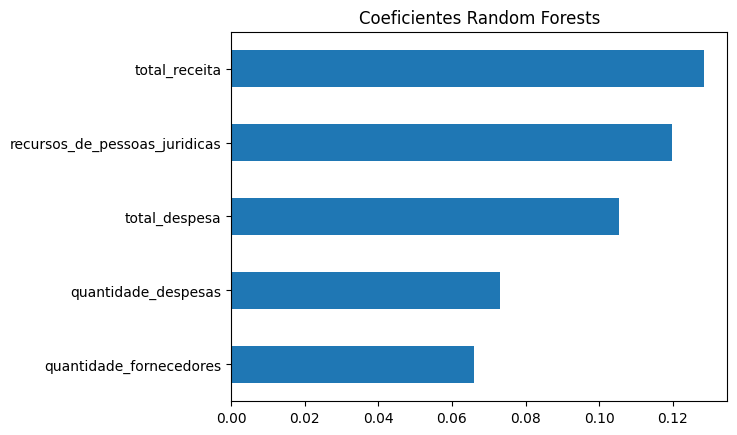

In [63]:
rf_coef =  pd.Series(mdl.feature_importances_, index=X_train.columns)
rf_imp_coef = pd.concat([rf_coef.sort_values().tail(5)])
rf_imp_coef.plot(kind = "barh")
plt.title("Coeficientes Random Forests")

#### Decision Tree

In [43]:
decision_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=42)

In [44]:
mean_absolute_error(y_test, predict_ohe)

0.08653846153846154

#### Acurácia da Árvore de Decisão

In [45]:
predict_tree = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, predict_tree)
print('Acurácia da Árvore de Decisão: %.3f%%' % (accuracy * 100))

Acurácia da Árvore de Decisão: 90.647%


In [46]:
print(classification_report(y_test, predict_tree))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       993
           1       0.61      0.82      0.70       151

    accuracy                           0.91      1144
   macro avg       0.79      0.87      0.82      1144
weighted avg       0.92      0.91      0.91      1144



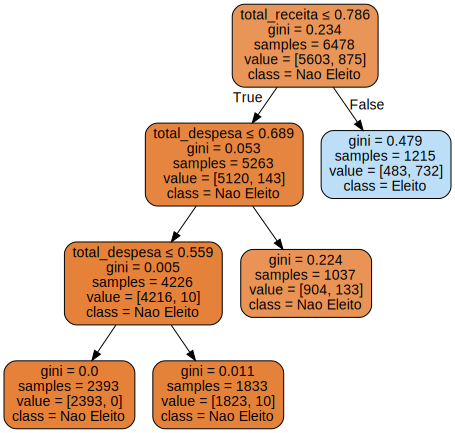

In [47]:
decision_tree_graph = tree.export_graphviz(decision_tree, out_file=None, 
                     feature_names=X_train.columns,
                     class_names=['Nao Eleito','Eleito'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(decision_tree_graph)  
graph

#### AdaBoost

In [72]:
decision_tree2 = DecisionTreeClassifier(max_depth=4, random_state=42)
ada_clf = AdaBoostClassifier(decision_tree2, n_estimators=200, learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=42),
                   learning_rate=0.5, n_estimators=200)

#### Acurácia AdaBoost

In [74]:
predict_ada = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, predict_ada)
print('Acurácia AdaBoost: %.3f%%' % (accuracy * 100))

Acurácia AdaBoost: 89.336%


In [70]:
print(classification_report(y_test, predict_ada))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       993
           1       0.65      0.52      0.58       151

    accuracy                           0.90      1144
   macro avg       0.79      0.74      0.76      1144
weighted avg       0.89      0.90      0.89      1144



Text(0.5, 1.0, 'Coeficientes Adaboost')

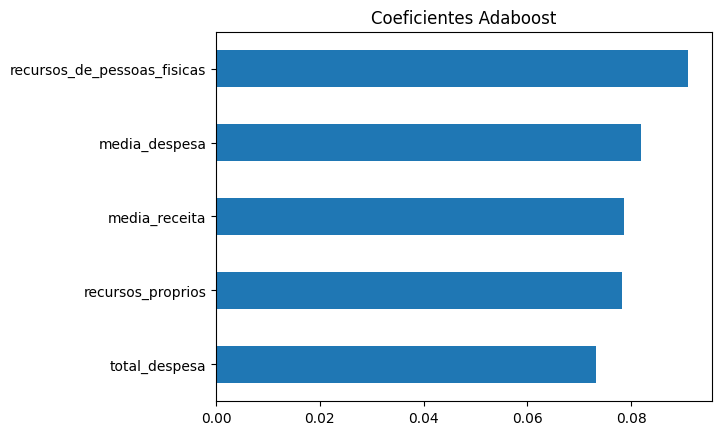

In [75]:
ab_coef =  pd.Series(ada_clf.feature_importances_, index=X_train.columns)
ab_imp_coef = pd.concat([ab_coef.sort_values().tail(5)])
ab_imp_coef.plot(kind = "barh")
plt.title("Coeficientes Adaboost")

#### Regressão Logística

Regressão Logística com AdaBoosta

In [51]:
lr_ada = LogisticRegression(random_state=42, max_iter=1000)
ada_clf2 = AdaBoostClassifier(lr_ada, n_estimators=200, learning_rate=0.5)
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                     random_state=42),
                   learning_rate=0.5, n_estimators=200)

Acurácia Regressão Logística com AdaBoosta

In [52]:
predict_lr_ada = ada_clf2.predict(X_test)
accuracy = accuracy_score(y_test, predict_lr_ada)
print('Acurácia Regressão Logística: %.3f%%' % (accuracy * 100))

Acurácia Regressão Logística: 91.958%


In [53]:
print(classification_report(y_test, predict_lr_ada))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       993
           1       0.78      0.55      0.64       151

    accuracy                           0.92      1144
   macro avg       0.86      0.76      0.80      1144
weighted avg       0.91      0.92      0.91      1144



Regressão Logística sem AdaBoost

In [54]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Acurácia Regressão Logística

In [55]:
predict_lr = lr.predict(X_test)
accuracy = accuracy_score(y_test, predict_lr)
print('Acurácia Regressão Logística: %.3f%%' % (accuracy * 100))

Acurácia Regressão Logística: 92.220%


In [56]:
print(classification_report(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       993
           1       0.77      0.59      0.67       151

    accuracy                           0.92      1144
   macro avg       0.85      0.78      0.81      1144
weighted avg       0.92      0.92      0.92      1144



Text(0.5, 1.0, 'Coeficientes Regressao Logística')

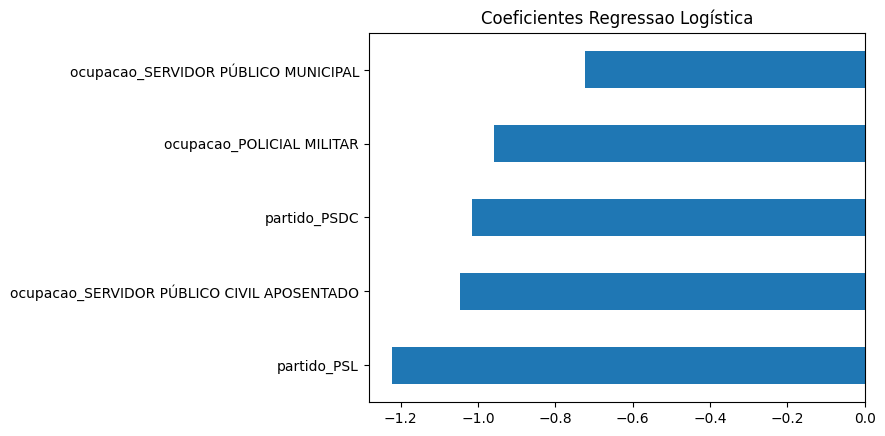

In [57]:
lr_coef =  pd.Series(lr.coef_[0], index=X_train.columns)
lr_imp_coef = pd.concat([lr_coef.sort_values().head(5)])
lr_imp_coef.plot(kind = "barh")
plt.title("Coeficientes Regressao Logística")

GradientBoost

In [58]:
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, random_state=42)

Acurácia GradientBoost

In [59]:
predict_gb_clf = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, predict_gb_clf)
print('Acurácia GradientBoost: %.3f%%' % (accuracy * 100))

Acurácia GradientBoost: 90.997%


In [60]:
print(classification_report(y_test, predict_gb_clf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       993
           1       0.66      0.64      0.65       151

    accuracy                           0.91      1144
   macro avg       0.81      0.80      0.80      1144
weighted avg       0.91      0.91      0.91      1144



Text(0.5, 1.0, 'Coeficientes Gradient Boosting')

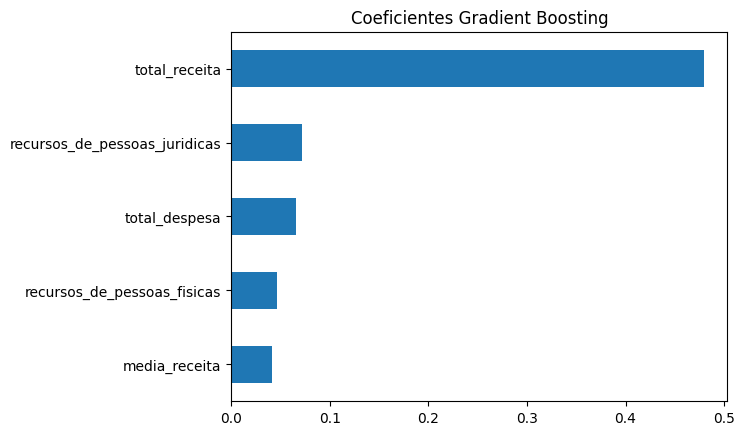

In [62]:
gb_coef =  pd.Series(gb_clf.feature_importances_, index=X_train.columns)
gb_imp_coef = pd.concat([gb_coef.sort_values().tail(5)])
gb_imp_coef.plot(kind = "barh")
plt.title("Coeficientes Gradient Boosting")

### As caracteríticas predominates nos modelos são `total_receita` e `total_despesa`, aparecendo em 4 dos 5 modelos plotados

#### 5. Envie seus melhores modelos conforme resultados nos dados de teste. Sugestões para melhorar o modelo: (10 pts.)

    - 1. Experimente outros modelos (e.g. SVM, RandomForests e GradientBoosting).
    - 2. Experimente balancear as classes,  caso estejam desbalanceadas.

In [79]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [82]:
predict_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, predict_svm)
print('Acurácia SVM: %.3f%%' % (accuracy * 100))

Acurácia SVM: 91.608%


In [83]:
print(classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       993
           1       0.75      0.55      0.63       151

    accuracy                           0.92      1144
   macro avg       0.84      0.76      0.79      1144
weighted avg       0.91      0.92      0.91      1144



Text(0.5, 1.0, 'Coeficientes SVM')

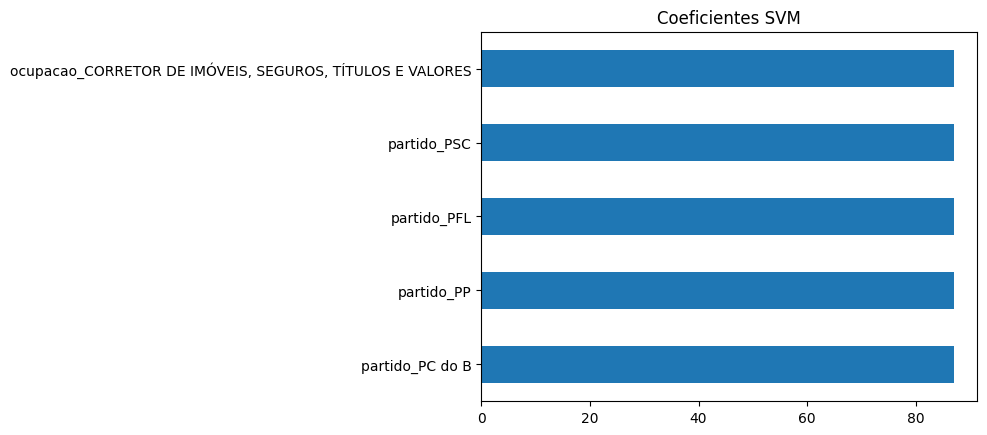

In [90]:
svm_coef =  pd.Series(svm.n_features_in_, index=X_train.columns)
svm_imp_coef = pd.concat([svm_coef.sort_values().tail(5)])
svm_imp_coef.plot(kind = "barh")
plt.title("Coeficientes SVM")